In [ ]:
# 단순회귀분석
# 텐서플로 1.0 버전으로

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

learning_rate = 0.01 # 학습률 설정. 기울기를 얼만큼 이동시킬 것인지
epochs = 1000 # 학습 횟수
step_display = 50 # 출력은 50번에 한번씩

x = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

weight = tf.Variable(tf.random_uniform([1],-1.0,1.0), name="weight") # 가중치
bias = tf.Variable(tf.random_uniform([1],-1.0,1.0), name="bias") # 절편

X = tf.placeholder(dtype=tf.float32, name="X")
Y = tf.placeholder(dtype=tf.float32, name="Y")

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
y_pred = tf.add(tf.multiply(weight, X), bias) # 1차함수 출력값
cost = tf.reduce_mean(tf.square(y_pred - Y)) # 손실함수
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) # 오차를 최소로 만드는 최적화함수

init = tf.global_variables_initializer() # 변수 초기화
sess = tf.Session()
sess.run(init)

2021-12-24 10:20:13.657370: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
for epoch in range(epochs):
    _, cost_val = sess.run([optimizer, cost], feed_dict={X: x, Y: y})
    if (epoch + 1) % step_display == 0:
        print("Epoch: {0}, cost: {1}, weight: {2}, bias: {3}".format(epoch+1,
        cost_val, sess.run(weight), sess.run(bias)))

Epoch: 50, cost: 0.05119900405406952, weight: [0.7341831], bias: [-0.06464151]
Epoch: 100, cost: 0.04770997166633606, weight: [0.72925574], bias: [-0.01093418]
Epoch: 150, cost: 0.044972073286771774, weight: [0.7153203], bias: [0.04798573]
Epoch: 200, cost: 0.042133063077926636, weight: [0.6988725], bias: [0.11294726]
Epoch: 250, cost: 0.03936782106757164, weight: [0.6815527], bias: [0.18169175]
Epoch: 300, cost: 0.03679993748664856, weight: [0.6638905], bias: [0.2517733]
Epoch: 350, cost: 0.034503232687711716, weight: [0.6463642], bias: [0.3213185]
Epoch: 400, cost: 0.0325133390724659, weight: [0.62934566], bias: [0.38885003]
Epoch: 450, cost: 0.030836990103125572, weight: [0.6131209], bias: [0.45323306]
Epoch: 500, cost: 0.029460541903972626, weight: [0.59790057], bias: [0.5136308]
Epoch: 550, cost: 0.028357097879052162, weight: [0.58383], bias: [0.569467]
Epoch: 600, cost: 0.027492433786392212, weight: [0.570997], bias: [0.6203918]
Epoch: 650, cost: 0.026829605922102928, weight: [0.

In [4]:
training_cost = sess.run(cost, feed_dict={X: x, Y: y})

print("최종 cost: ",cost_val)
print("정확도: ",100-cost_val)
print("최종 가중치: ",sess.run(weight))
print("최종 절편: ",sess.run(bias))

최종 cost:  0.025245873
정확도:  99.97475412674248
최종 가중치:  [0.5109489]
최종 절편:  [0.85868436]


In [5]:
print("X: 5, Y: ",sess.run(y_pred, feed_dict={X: 5}))
print("X: 2.5, Y: ",sess.run(y_pred, feed_dict={X: 2.5}))

X: 5, Y:  [3.4134288]
X: 2.5, Y:  [2.1360567]


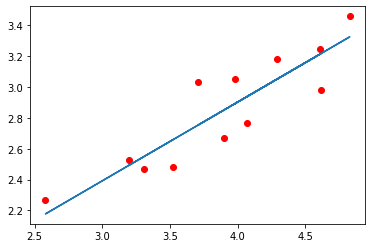

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y,'ro')
plt.plot(x, sess.run(weight)*x + sess.run(bias))
plt.show()

In [7]:
sess.close()